# TD3 : Data Mining for Networks

Authors : Yana RAGOZINA, Thomas PAUL

## Assignment 1

### Exercise 1 - Gradient descent

On paper

### Exercise 2 - Linear regression and Gradient descent

In [1]:
import sklearn


## Assignment 2

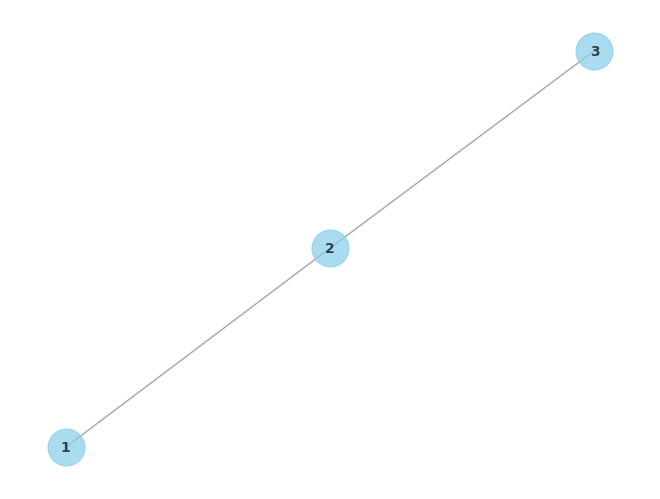

In [14]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Creating a simple graph
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)

G1.add_edge(1, 2)
G1.add_edge(2, 3)

G2 = nx.Graph()
G2.add_node(1)
G2.add_node(2)
G2.add_node(3)

G2.add_edge(1, 2)
G2.add_edge(2, 3)
G2.add_edge(1, 3)

# Displaying the graph
pos = nx.spring_layout(G1)  # You can use other layout algorithms as well
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)
plt.show()

In [15]:
def graph_edit_distance(graph1, graph2):
    node_insertion_cost=1
    node_deletion_cost=1
    edge_insertion_cost=1
    edge_deletion_cost=1
    edge_substitution_cost=1

    # adjacency matrix
    adj_matrix1 = np.array(nx.adjacency_matrix(graph1).todense())
    adj_matrix2 = np.array(nx.adjacency_matrix(graph2).todense())

    # number of nodes of each graph
    n_nodes1 = len(graph1.nodes())
    n_nodes2 = len(graph2.nodes())

    dp_matrix = np.zeros((n_nodes1 + 1, n_nodes2 + 1))
    
    for i in range(1, n_nodes1 + 1):
        dp_matrix[i, 0] = dp_matrix[i - 1, 0] + node_deletion_cost

    for j in range(1, n_nodes2 + 1):
        dp_matrix[0, j] = dp_matrix[0, j - 1] + node_insertion_cost
    
    for i in range(1, n_nodes1 + 1):
        for j in range(1, n_nodes2 + 1):
            # Node Operations
            deletion_cost = dp_matrix[i - 1, j] + node_deletion_cost
            insertion_cost = dp_matrix[i, j - 1] + node_insertion_cost

            # Edge Operations
            edge_substitution_cost_ij = edge_substitution_cost if adj_matrix1[i - 1, j - 1] != adj_matrix2[i - 1, j - 1] else 0
            substitution_cost = dp_matrix[i - 1, j - 1] + edge_substitution_cost_ij
            dp_matrix[i, j] = min(deletion_cost, insertion_cost, substitution_cost)
     
    ged = dp_matrix[n_nodes1, n_nodes2]

    return ged

ged = graph_edit_distance(G1, G2)
print(ged)

[[0 1 0]
 [1 0 1]
 [0 1 0]]
3
0.0
